In [7]:
import numpy as np
import torch

from common import load_mnist
from optimizers import *
from nets import Net

x_train, y_train, x_test, y_test = load_mnist()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

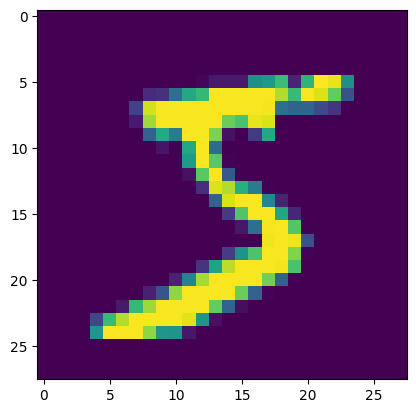

In [8]:
from common import to_image
import matplotlib.pyplot as plt

plt.imshow(to_image(x_train[0] * 255))
y_train[0]

### mini-batch 的实现

In [10]:

train_loss_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 64
epoch_size = train_size / batch_size
learning_rate = 0.01
network = Net()

optimizer = Adam(lr=learning_rate)

for i in range(0, iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.gradient(x_batch, y_batch)
    
    # 更新参数
    optimizer.update(network.params(), grad)
    
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    if i % epoch_size == 0:
        print(network.accuracy(x_test, y_test), loss)


0.1594 14.495018748925517
0.9537 0.6866426475585532
0.9569 0.6779537534612856
0.9639 0.4950446786431456
0.9659 0.1638385587490037
0.9621 0.13930064219057275


In [11]:
pred = network.predict(x_train[:100, :]).argmax(axis=1) # type: np.ndarray
(pred == y_train[:100, :].argmax(axis=1)).sum()

99

In [14]:
from torch.nn import Linear, MSELoss
import torch

line = Linear(100, 10)
print(line.weight)
line.forward(torch.rand(100))
loss = MSELoss()
ls = loss(line.forward(torch.rand(100)), torch.rand(10))
ls.backward()

line.weight.grad

Parameter containing:
tensor([[-3.6351e-03, -8.0713e-02, -3.1012e-02,  4.0315e-02,  7.1241e-02,
          1.8232e-02, -2.3766e-02, -3.2001e-02,  8.1452e-02, -7.9906e-02,
         -9.6543e-02, -4.3963e-02,  4.7425e-03, -8.1797e-02, -3.2832e-02,
         -2.5291e-02,  9.0282e-02,  2.6745e-02,  7.9437e-02, -5.4742e-02,
          8.9625e-02,  9.4219e-02, -4.5956e-02, -1.7401e-02, -1.3641e-02,
          8.8983e-02,  7.6566e-03, -4.7886e-03, -2.4853e-02, -8.3480e-02,
          7.8619e-02, -3.6282e-02,  8.0816e-02, -2.7683e-03,  9.0063e-02,
          2.5323e-02, -3.7437e-02, -5.8267e-02,  2.7826e-02, -6.8713e-02,
          3.8401e-02,  3.4798e-02, -4.1293e-02,  7.7246e-02,  7.2431e-03,
         -1.7247e-02, -2.4272e-03, -4.4874e-03,  3.6795e-02, -5.6717e-02,
          1.4774e-02, -1.9267e-02,  8.5126e-02,  6.7332e-03, -7.2557e-02,
         -3.7692e-03, -3.4161e-02,  5.2815e-02, -4.7343e-02,  9.1832e-02,
         -9.4979e-02, -3.8258e-02,  5.4120e-02, -5.4490e-02,  2.0861e-02,
         -3.7900

tensor([[-0.1146, -0.0108, -0.0445, -0.0781, -0.0520, -0.0712, -0.0623, -0.0304,
         -0.1180, -0.0316, -0.0859, -0.0329, -0.1028, -0.0390, -0.0305, -0.0142,
         -0.1148, -0.0512, -0.0234, -0.0259, -0.0250, -0.0965, -0.0465, -0.1058,
         -0.0679, -0.0294, -0.0742, -0.0378, -0.0844, -0.0565, -0.0556, -0.0054,
         -0.0781, -0.1000, -0.1086, -0.1029, -0.0704, -0.0200, -0.0699, -0.0975,
         -0.0212, -0.0449, -0.1167, -0.0360, -0.0085, -0.0285, -0.0217, -0.0655,
         -0.0704, -0.0289, -0.0913, -0.0355, -0.0147, -0.0446, -0.0720, -0.0534,
         -0.0085, -0.0474, -0.0840, -0.0656, -0.0103, -0.1081, -0.0905, -0.1078,
         -0.0418, -0.1169, -0.0055, -0.0353, -0.0405, -0.1154, -0.0769, -0.1004,
         -0.0682, -0.0207, -0.0355, -0.1184, -0.0620, -0.0044, -0.0302, -0.0687,
         -0.1187, -0.0478, -0.0975, -0.0274, -0.0307, -0.0900, -0.0268, -0.0409,
         -0.1193, -0.0084, -0.1037, -0.1148, -0.1057, -0.0383, -0.0375, -0.0749,
         -0.0479, -0.0229, -